<a href="https://colab.research.google.com/github/deivid308-pixel/FASE-04-CTWP-Cap3/blob/main/FASE_04_CTWP_Cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Da Terra ao Código: Classificação de Grãos com Machine Learning

Este notebook segue a metodologia **CRISP-DM** para desenvolver um modelo de aprendizado de máquina que classifique variedades de grãos de trigo com base em suas características físicas.

---
## Etapas:
1. Análise e Pré-processamento dos Dados
2. Implementação e Comparação de Algoritmos
3. Otimização dos Modelos
4. Interpretação dos Resultados


In [73]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [83]:
# Carregar o Seeds Dataset
columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width', 'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=columns, skipinitialspace=True)

# Exibir as primeiras linhas
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2315157085.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=columns, skipinitialspace=True)


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


from matplotlib import pyplot as plt
_df_96['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_97['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_98['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99['Compactness'].plot(kind='hist', bins=20, title='Compactness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100.plot(kind='scatter', x='index', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_101.plot(kind='scatter', x='Area', y='Perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_102.plot(kind='scatter', x='Perimeter', y='Compactness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_103.plot(kind='scatter', x='Compactness', y='Kernel_Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_104.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Perimeter']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_105.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Perimeter')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Compactness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_106.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Compactness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Kernel_Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_107.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Kernel_Length')

from matplotlib import pyplot as plt
_df_108['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_109['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_110['Perimeter'].plot(kind='line', figsize=(8, 4), title='Perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_111['Compactness'].plot(kind='line', figsize=(8, 4), title='Compactness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [84]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Acessar o modelo SVM treinado
svm_model = models['SVM']

# Calcular a Permutation Importance
# Usamos X_test e y_test para avaliar a importância em dados não vistos
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Obter os nomes das features
feature_names = X.columns

# Criar um DataFrame para melhor visualização
svm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Ordenar por importância
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

print("Permutation Importance das Features para o SVM:")
display(svm_importance_df)

Permutation Importance das Features para o SVM:


,Feature,Importance
6,Kernel_Groove_Length,0.150794
5,Asymmetry_Coeff,0.088889
1,Perimeter,0.052381
0,Area,0.041270
4,Kernel_Width,0.039683
3,Kernel_Length,0.025397
2,Compactness,0.011111


from matplotlib import pyplot as plt
svm_importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
svm_importance_df.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
svm_importance_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(svm_importance_df['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(svm_importance_df, x='Importance', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Os resultados acima mostram a Permutation Importance de cada característica para o modelo SVM, ordenadas da mais importante para a menos importante. Isso nos permite comparar a relevância das features entre os modelos Random Forest e SVM.

In [81]:
# Acessar o modelo Random Forest treinado
rf_model = models['Random Forest']

# Obter a importância das features
feature_importances = rf_model.feature_importances_

# Obter os nomes das features
feature_names = X.columns

# Criar um DataFrame para melhor visualização
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importância das Features para o Random Forest:")
display(importance_df)

Importância das Features para o Random Forest:


,Feature,Importance
0,Area,0.231120
6,Kernel_Groove_Length,0.200906
1,Perimeter,0.174483
4,Kernel_Width,0.144158
3,Kernel_Length,0.124009
5,Asymmetry_Coeff,0.074848
2,Compactness,0.050476


from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
importance_df.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(importance_df['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(importance_df, x='Importance', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [82]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=importance_df)

https://docs.google.com/spreadsheets/d/1nsRE-HzA2f30R5Qx7zH43rqaONppIF75fOzatz5uVsM/edit#gid=0


Os resultados acima mostram a importância de cada característica (feature) para o modelo Random Forest, ordenadas da mais importante para a menos importante. Isso nos ajuda a entender quais características o modelo considerou mais relevantes para fazer suas previsões.

In [75]:
# Estatísticas descritivas
print(df.describe())
print("Medianas:\n", df.median())
print("Desvios padrão:\n", df.std())

             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coeff  Kernel_Groove_Length       Class  
count       210.000000            210.000000  210.000000  
mean          3.700201              5.408071    2.000000  
std           1.503557              0.491480    0.818448  
min           0.765100              4.519000    1.000000  
25%           2.561500       

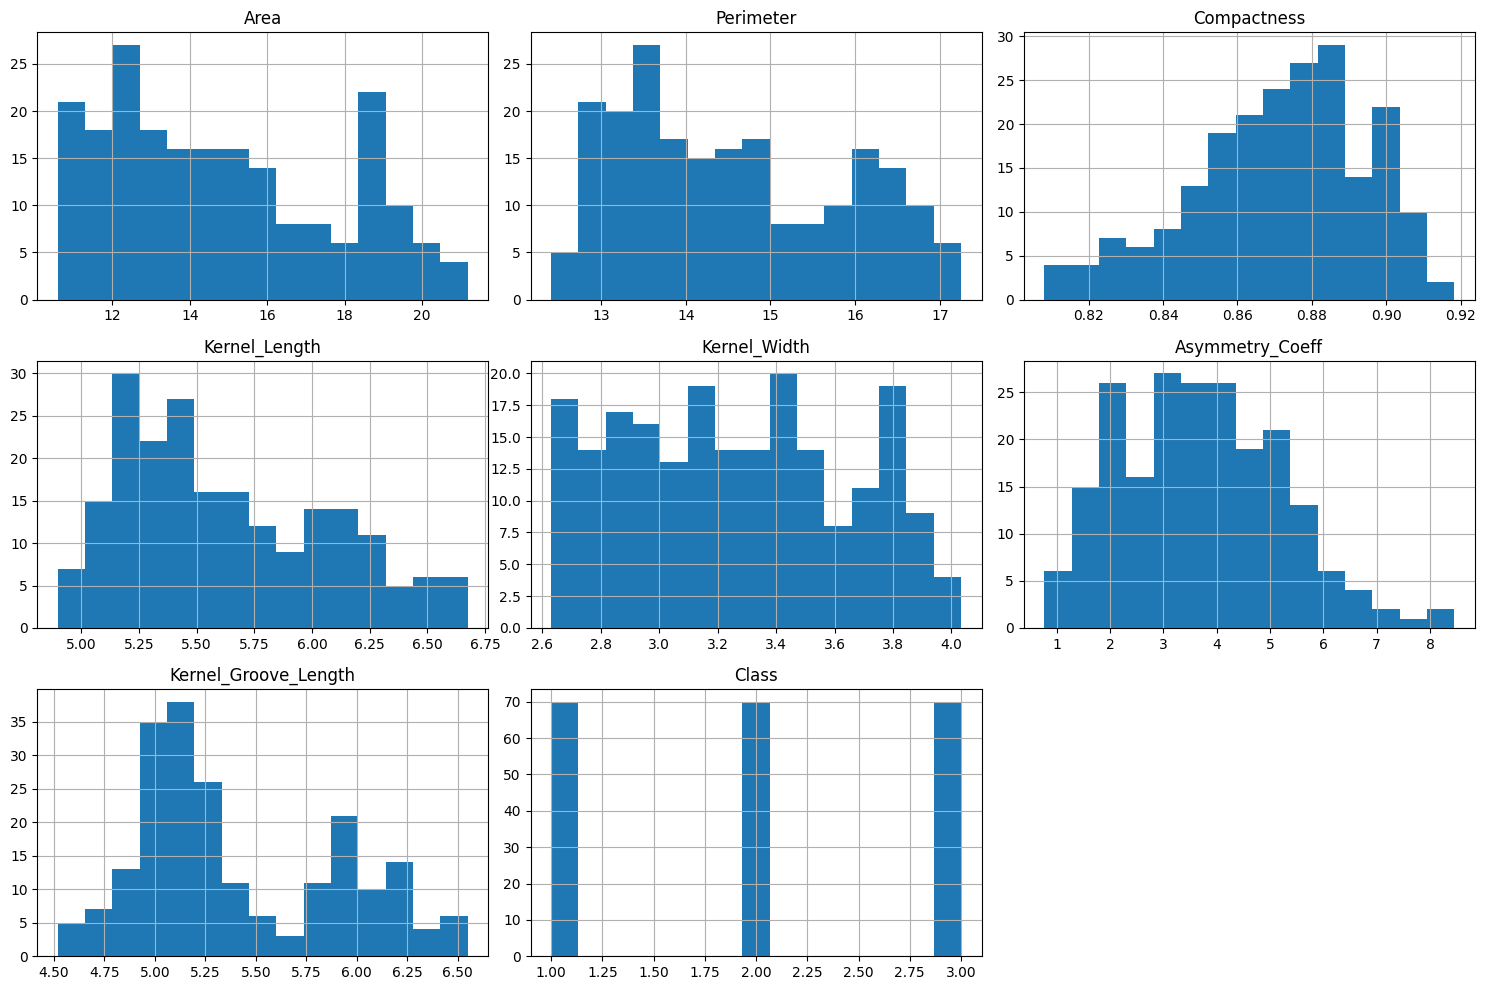

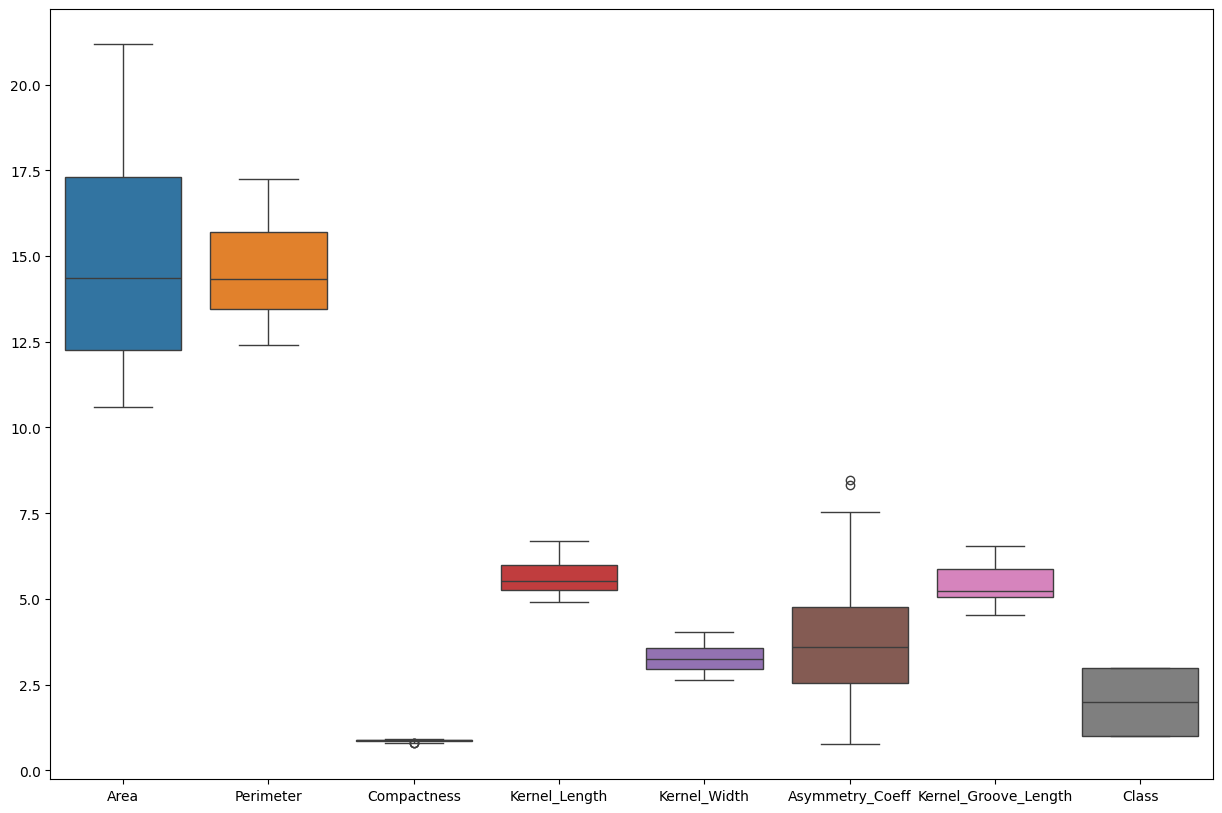

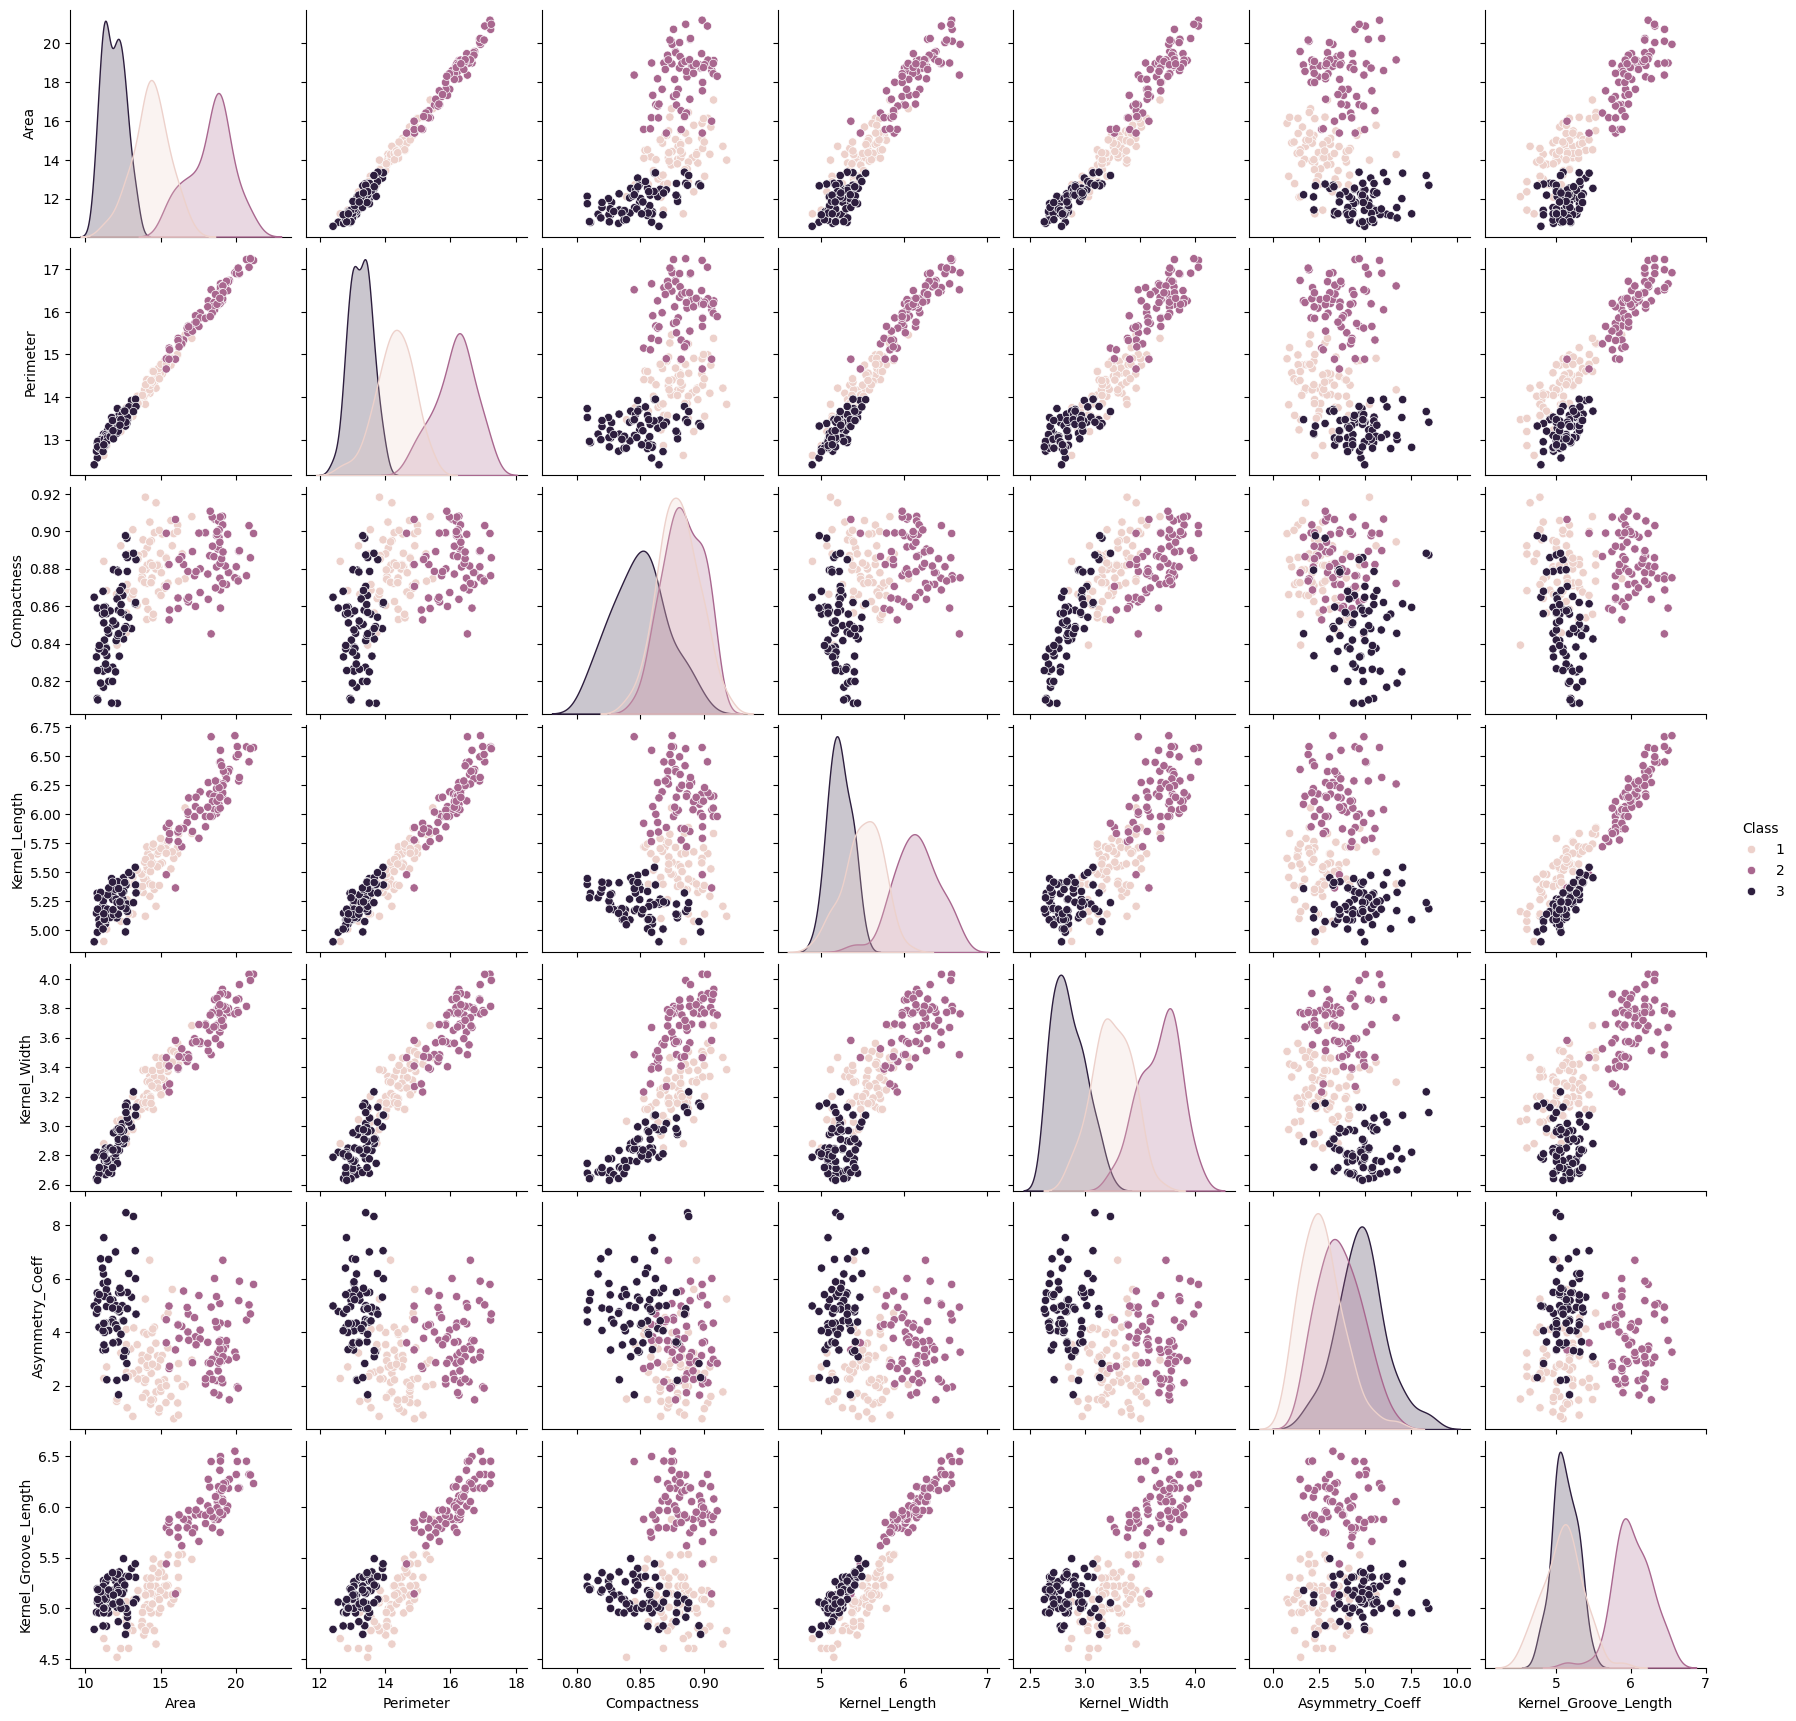

In [76]:
# Histogramas
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

# Pairplot para correlações
sns.pairplot(df, hue='Class')
plt.show()

In [77]:
# Verificar valores ausentes
print(df.isnull().sum())

# Padronização dos dados
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=columns[:-1])
df_scaled['Class'] = df['Class']
df_scaled.head()

Area                    0
Perimeter               0
Compactness             0
Kernel_Length           0
Kernel_Width            0
Asymmetry_Coeff         0
Kernel_Groove_Length    0
Class                   0
dtype: int64


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


from matplotlib import pyplot as plt
_df_112['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_113['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_114['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_115['Compactness'].plot(kind='hist', bins=20, title='Compactness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_116.plot(kind='scatter', x='index', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_117.plot(kind='scatter', x='Area', y='Perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_118.plot(kind='scatter', x='Perimeter', y='Compactness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_119.plot(kind='scatter', x='Compactness', y='Kernel_Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_120.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Perimeter']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_121.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Perimeter')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Compactness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_122.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Compactness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Kernel_Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_123.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Kernel_Length')

from matplotlib import pyplot as plt
_df_124['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_125['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_126['Perimeter'].plot(kind='line', figsize=(8, 4), title='Perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_127['Compactness'].plot(kind='line', figsize=(8, 4), title='Compactness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [86]:
# Separar dados em treino e teste
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [87]:
# Treinar e avaliar modelos
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

print("\nResumo dos resultados:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")


KNN Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63


SVM Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.9

In [89]:
# Exemplo de otimização com GridSearch para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Melhores parâmetros KNN:", grid_knn.best_params_)

Melhores parâmetros KNN: {'n_neighbors': 5}


## Interpretação dos Resultados
- Compare os modelos com base nas métricas.
- Discuta qual modelo é mais adequado para a classificação de grãos.
- Sugira melhorias e próximos passos.
